# Maximum Likelihood Estimation

Maximum likelihood estimation identifies the parameter value(s) that **maximizes the probability of observing your actual data**, essentially asking "which model settings would make what we actually saw most likely to occur?"

# Graphical Summary

![Fig](./graphical_summary/slides/Slide20.png)

# Key Formula

Maximum Likelihood Estimation (MLE) finds the parameter value that makes our observed data most probable. In other words, say that each model $\text{M}$ has only one parameter $\theta$, and among all possible values of $\theta$, MLE chooses the one that maximizes the likelihood function. For a model with parameter $\theta$ (e.g., the genetic effect $\beta$), the maximum likelihood estimator is:

$$
\hat{\theta} = \underset{\theta \in \Theta}{\operatorname{argmax}} \mathcal{L}(\theta\mid\text{D}) = \underset{\theta \in \Theta}{\operatorname{argmax}} P(\text{D}\mid\theta)
$$

Where:
- $\hat{\theta}$ is our estimated parameter value (the "hat" indicates it's an estimate)
- $\theta$ represents the (general symbol of) parameter we want to estimate (e.g., $\beta$ in our genetic model)
- $\Theta$ is the parameter space - all possible values $\theta$ can take
- $\text{D}$ is our observed data
- $\operatorname{argmax}$ means "the argument (value of $\theta$) that maximizes the function"

# Technical Details

## Work With Log-Likelihood

We have introduced log-likelihood before:

$$
\ell(\theta \mid \text{D}) = \ln \mathcal{L}(\theta \mid \text{D})
$$

Since the logarithm is a monotonic function, the maximum of $\ell(\theta \mid \text{D})$ occurs at the same value of $\theta$ as does the maximum of $\mathcal{L}(\theta \mid \text{D})$. This transformation is particularly useful because:

1. **Numerical stability**: Likelihood values can be extremely small, leading to numerical underflow
2. **Computational convenience**: Products become sums, which are easier to work with
3. **Mathematical tractability**: Many probability distributions have simpler derivatives in log form

## Likelihood Equations

If $\ell(\theta \mid \text{D})$ is differentiable in $\Theta$, sufficient conditions for the occurrence of a maximum (or minimum) are:

$$
\frac{\partial \ell(\theta \mid \text{D})}{\partial \theta} = 0
$$

These are known as the **likelihood equations** or **score equations**. Solving these equations gives us the maximum likelihood estimator $\hat{\theta}$.

## Independent and Identically Distributed (IID) Data

If the data are independent and identically distributed, then we have:

$$
\mathcal{L}(\theta \mid \text{D}) = \prod_{i=1}^{n} P(\text{D}_i \mid \theta)
$$

Taking the log-likelihood:

$$
\ell(\theta \mid \text{D}) = \sum_{i=1}^{n} \ln P(\text{D}_i \mid \theta)
$$

This decomposition is fundamental because it transforms the product of individual probabilities into a sum of log-probabilities, making both computation and differentiation much more manageable.

The IID assumption is crucial in genetics because it allows us to treat each individual's genotype-phenotype observation as independent, enabling us to multiply their individual likelihoods to get the overall likelihood for our dataset.

# Related Topics

- [likelihood](https://statfungen.github.io/statgen-primer/likelihood.html)
- [minor allele frequency](https://statfungen.github.io/statgen-primer/minor_allele_frequency.html)
- [ordinary least squares](https://statfungen.github.io/statgen-primer/ordinary_least_squares.html)
- [summary statistics](https://statfungen.github.io/statgen-primer/summary_statistics.html)


# Example

So far we've been comparing different theories with fixed parameter values - like comparing $\beta$ = 0 versus $\beta$ = 0.5 versus $\beta$ = 1.0. But what if we don't want to limit ourselves to just a few specific values? What if we want to find the **single best parameter value that maximizes the likelihood**?

This is exactly what maximum likelihood estimation (MLE) does. Instead of testing a handful of theories, **MLE searches across all possible parameter values to find the one that makes our observed data most likely**.


## Example 1 -- Allele Frequency

Now let's reconsider the question of estimating minor allele frequency. We have done this in [Lecture: minor allele frequency](https://statfungen.github.io/statgen-primer/minor_allele_frequency.html) using simple counting, but in practice geneticists use MLE because it handles missing data naturally and provides more stable estimates with small sample sizes. Also it is impossible for you to obtain the data for every sample in the population and sequence all of them.

We're asking "**what's the most plausible frequency of the T allele in the population?**" MLE will give us the single best estimate by finding the frequency that maximizes the likelihood of seeing exactly these genotypes.

### Calculate MLE From Likelihood Function

In [1]:
# Clear the environment
rm(list = ls())

# Define genotypes for 5 individuals at 1 variant
# Observed genotypes: CC, TT, CT, CC, CC
genotypes <- c("CC", "TT", "CT", "CC", "CC")
names(genotypes) <- paste("Individual", 1:5)

# Define alleles for this variant
alt_allele <- "T"  # alternative allele
ref_allele <- "C"  # reference allele

We observed genotype data for five individuals: CC, TT, CT, CC, and CC (this is our observed data $\text{D}$). We want to estimate the frequency of the alternative allele `T` for this variant.

Let $f_T$ denote the true frequency of the `T` allele. For each $f_T \in [0,1]$, let $\text{M}_{f_T}$ denote the model where the true frequency of the `T` allele is $f_T$.

From our observation, we see that 3 out of 10 alleles (2 alleles per individual since humans are diploid) carry the `T` allele.

Then we can calculate the likelihood model $\text{M}_{f_T}$ is, by definition:

$$
\mathcal{L}(\text{M}_{f_T} \mid \text{D}) = P(\text{D} \mid \text{M}_{f_T})
$$

For each genotype, the probabilities under Hardy-Weinberg equilibrium are:
- CC: $(1-f_T)^2$
- TT: $f_T^2$ 
- CT: $2f_T(1-f_T)$

Therefore, the likelihood is:

$$
\mathcal{L}(\text{M}_{f_T} \mid \text{D}) = (1-f_T)^2 \times f_T^2 \times 2f_T(1-f_T) \times (1-f_T)^2 \times (1-f_T)^2 = 2f_T^3(1-f_T)^7
$$

When computing likelihoods for parametric models, we often use the parameter value to denote the model. So instead of $\mathcal{L}(\text{M}_{f_T} \mid \text{D})$, we write $\mathcal{L}(f_T \mid \text{D})$:

$$
\mathcal{L}(f_T \mid \text{D}) = 2f_T^3(1-f_T)^7
$$



We then plot the likelihood function as follows:

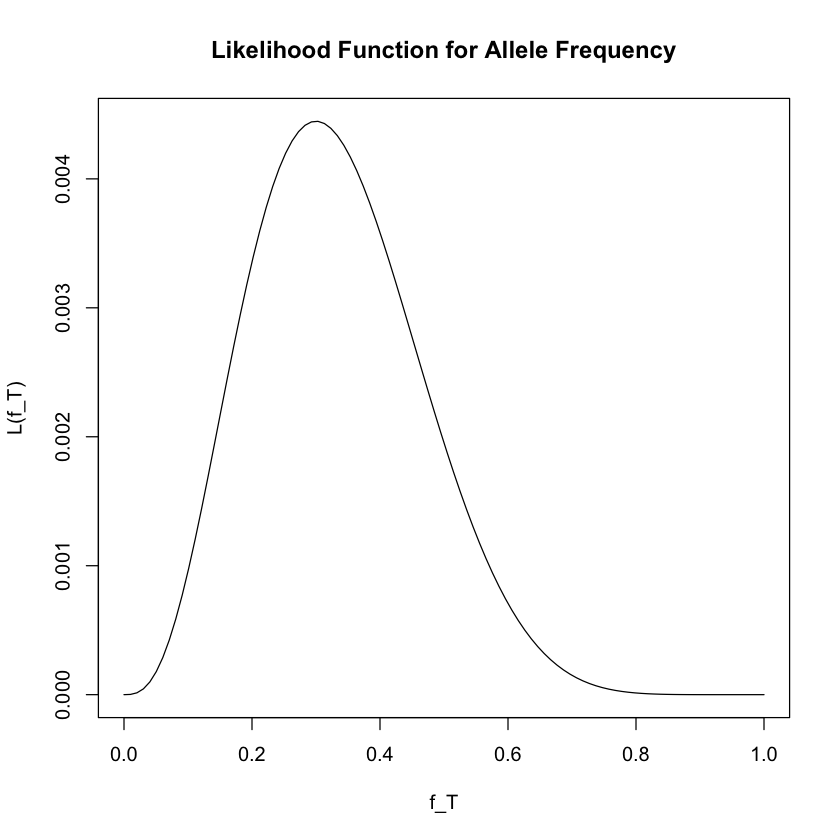

In [2]:
# Plot the likelihood function
f_T <- seq(0, 1, length = 100)
L <- function(f_T) {
    2 * f_T^3 * (1 - f_T)^7
}

plot(f_T, L(f_T), ylab = "L(f_T)", xlab = "f_T", type = "l", 
     main = "Likelihood Function for Allele Frequency")

The value of $f_T$ that maximizes the likelihood function is the **maximum likelihood estimate**, denoted $\hat{f_T}$:

$$
\hat{f_T} = \underset{f_T \in [0,1]}{\operatorname{argmax}} \mathcal{L}(f_T \mid \text{D})
$$

From the plot, we can see that the maximum likelihood estimate is $\hat{f_T} = 0.3$, which corresponds to our intuition (3 out of 10 observed alleles were `T`).


### Calculate MLE From Log-likelihood Function

It is often convenient to work with the log-likelihood function, denoted $\ell(f_T \mid \text{D})$:

$$
\ell(f_T \mid \text{D}) = \ln \mathcal{L}(f_T \mid \text{D}) = \ln(2) + 3\ln(f_T) + 7\ln(1-f_T)
$$


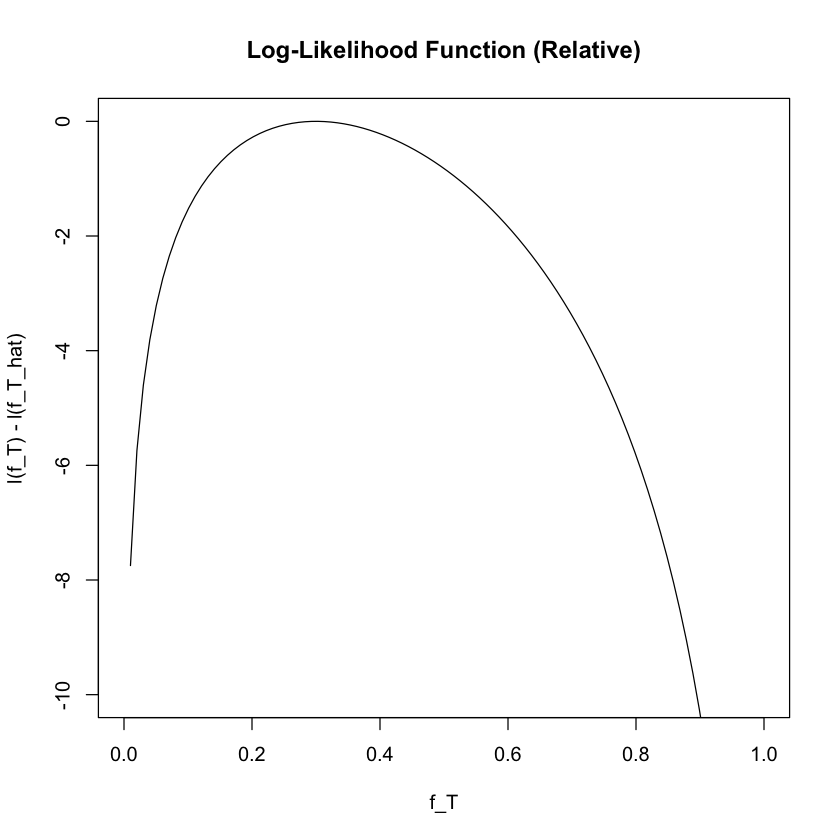

In [3]:
# Plot the log-likelihood function (relative to maximum)
l <- function(f_T) {
    log(2) + 3 * log(f_T) + 7 * log(1 - f_T)
}

plot(f_T, l(f_T) - l(0.3), ylab = "l(f_T) - l(f_T_hat)", xlab = "f_T", 
     type = "l", ylim = c(-10, 0), main = "Log-Likelihood Function (Relative)")

Changes in the log-likelihood function are measured in "log-likelihood units." For example, the difference in support between $f_T = 0.3$ and $f_T = 0.35$ is $\ell(0.3 \mid \text{D}) - \ell(0.35 \mid \text{D}) = 0.563$ log-likelihood units.


### Analytical Solution

In this simple case, we can calculate $\hat{f_T}$ analytically using calculus:

**Step 1**: Take the natural logarithm of the likelihood function:

$$
\ell(f_T \mid \text{D}) = \ln(2) + 3\ln(f_T) + 7\ln(1-f_T)
$$

**Step 2**: Find the critical point by taking the derivative and setting it to zero:

$$
\frac{d\ell(f_T \mid \text{D})}{df_T} = \frac{3}{f_T} - \frac{7}{1-f_T} = 0
$$

**Step 3**: Solve for $f_T$:

$$
\frac{3}{f_T} = \frac{7}{1-f_T}
$$

$$
3(1-f_T) = 7f_T
$$

$$
3 - 3f_T = 7f_T
$$

$$
3 = 10f_T
$$

$$
f_T = \frac{3}{10} = 0.3
$$

**Step 4**: Verify it's a maximum by checking the second derivative:

$$
\frac{d^2\ell(f_T \mid \text{D})}{df_T^2} = -\frac{3}{f_T^2} - \frac{7}{(1-f_T)^2} < 0
$$

This is always negative for $f_T \in (0,1)$, confirming we have a maximum.

## Example 2 -- Genetic Effect

Looking at our likelihood results about the genetic effect in [Lecture: likelihood](https://statfungen.github.io/statgen-primer/likelihood.html), we see that Model 2 ($\beta = 0.5$) performs better than both Model 1 ($\beta = 0$) and Model 3 ($\beta = 1.0$). But this raises an interesting question: we only tested three specific values. What if the optimal $\beta$ is somewhere between 0.5 and 1.0, or maybe 0.4 or 0.6? 

Instead of guessing more values to test, we can use **Maximum Likelihood Estimation (MLE)** to find $\hat{\beta}$ that maximizes the likelihood function. Then we can compare this optimal estimate to our models - particularly the null model ($\beta = 0$), which is often of special interest in genetics because it represents "no genetic effect."


In [4]:
# Clear the environment
rm(list = ls())
set.seed(19)  # For reproducibility

# Generate genotype data for 5 individuals at 1 variant
N <- 5
genotypes <- c("CC", "CT", "TT", "CT", "CC")  # Individual genotypes
names(genotypes) <- paste("Individual", 1:N)

# Define alternative allele
alt_allele <- "T"

# Convert to additive genotype coding (count of alternative alleles)
Xraw_additive <- numeric(N)
for (i in 1:N) {
  alleles <- strsplit(genotypes[i], "")[[1]]
  Xraw_additive[i] <- sum(alleles == alt_allele)
}
names(Xraw_additive) <- names(genotypes)

# Standardize genotypes
X <- scale(Xraw_additive, center = TRUE, scale = TRUE)[,1]

# Set true beta and generate phenotype data
true_beta <- 0.4
true_sd <- 1.0

# Generate phenotype with true effect
Y <- X * true_beta + rnorm(N, 0, true_sd)
cat("true effect beta =", round(true_beta, 4), "\n")


true effect beta = 0.4 


Now, let's create two functions to compute the likelihood and log-likelihood:

In [5]:
# Likelihood function for normal distribution
likelihood <- function(beta, sd, X, Y) {
  # Calculate expected values under the model
  mu <- X * beta
  
  # Calculate likelihood (product of normal densities)
  prod(dnorm(Y, mean = mu, sd = sd, log = FALSE))
}

# Log-likelihood function (more numerically stable)
log_likelihood <- function(beta, sd, X, Y) {
  # Calculate expected values under the model
  mu <- X * beta
  
  # Calculate log-likelihood (sum of log normal densities)
  sum(dnorm(Y, mean = mu, sd = sd, log = TRUE))
}

In [6]:
# Find the MLE by optimizing the log-likelihood function
mle_result <- optimize(log_likelihood, 
                       interval = c(-2, 2),  # Search range for beta
                       maximum = TRUE,       # We want to maximize
                       sd = true_sd, 
                       X = X, 
                       Y = Y)

beta_mle <- mle_result$maximum
log_lik_mle <- mle_result$objective

cat("Maximum Likelihood Estimate (MLE):\n")
cat("Beta_MLE =", round(beta_mle, 4), "\n")
cat("Log-likelihood at MLE =", round(log_lik_mle, 4), "\n\n")

# Compare MLE to Model 1 (beta = 0)
beta_null <- 0
log_lik_null <- log_likelihood(beta = beta_null, sd = true_sd, X = X, Y = Y)
lik_null <- likelihood(beta = beta_null, sd = true_sd, X = X, Y = Y)
lik_mle <- likelihood(beta = beta_mle, sd = true_sd, X = X, Y = Y)

# Calculate likelihood ratio: MLE vs Null model
lr_mle_vs_null <- lik_mle / lik_null
log_lr_mle_vs_null <- log_lik_mle - log_lik_null

Maximum Likelihood Estimate (MLE):
Beta_MLE = 0.3169 
Log-likelihood at MLE = -6.054 



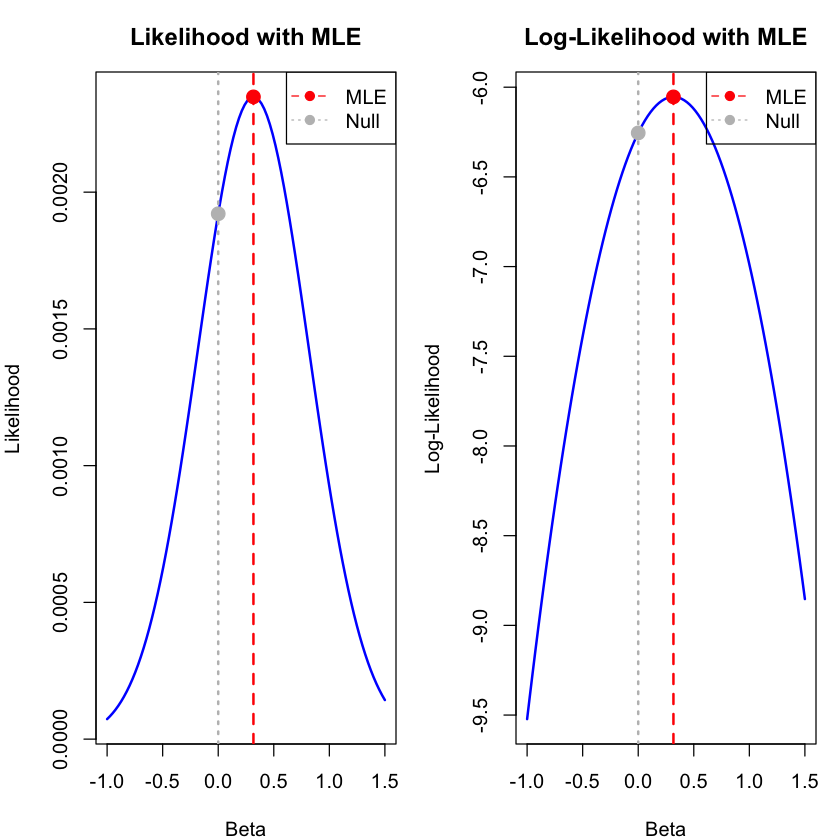

In [7]:
# Visualize the likelihood function with MLE highlighted
beta_range <- seq(-1, 1.5, length.out = 100)
likelihood_values <- sapply(beta_range, function(b) likelihood(b, true_sd, X, Y))
log_likelihood_values <- sapply(beta_range, function(b) log_likelihood(b, true_sd, X, Y))

# Set up plotting parameters for better layout
par(mfrow = c(1, 2), mar = c(4, 4, 3, 1))  # Adjust margins

# Plot likelihood function
plot(beta_range, likelihood_values, type = "l", 
     xlab = "Beta", ylab = "Likelihood",
     main = "Likelihood with MLE",  # Shorter title
     col = "blue", lwd = 2)
abline(v = beta_mle, col = "red", lwd = 2, lty = 2)
abline(v = 0, col = "gray", lwd = 2, lty = 3)
points(beta_mle, lik_mle, col = "red", pch = 19, cex = 1.5)
points(0, lik_null, col = "gray", pch = 19, cex = 1.5)
legend("topright", 
       legend = c("MLE", "Null"), 
       col = c("red", "gray"), 
       lty = c(2, 3), 
       pch = c(19, 19))

# Plot log-likelihood function
plot(beta_range, log_likelihood_values, type = "l", 
     xlab = "Beta", ylab = "Log-Likelihood",
     main = "Log-Likelihood with MLE",  # Shorter title
     col = "blue", lwd = 2)
abline(v = beta_mle, col = "red", lwd = 2, lty = 2)
abline(v = 0, col = "gray", lwd = 2, lty = 3)
points(beta_mle, log_lik_mle, col = "red", pch = 19, cex = 1.5)
points(0, log_lik_null, col = "gray", pch = 19, cex = 1.5)
legend("topright", 
       legend = c("MLE", "Null"), 
       col = c("red", "gray"), 
       lty = c(2, 3), 
       pch = c(19, 19))

par(mfrow = c(1, 1), mar = c(5, 4, 4, 2) + 0.1)  # Reset to defaults

Other than the figure, we can also derive the MLE analytically using calculus. This shows how we can find the optimal value across the entire parameter space. But please note that in more complicated cases it is almost impossible to get explicit solutions.

For our model $Y = X \beta + \epsilon$ where $\epsilon \sim N(0, \sigma^2)$, the MLE is:

$$
\hat{\beta} = \frac{\sum_{i=1}^n X_i Y_i}{\sum_{i=1}^n X_i^2}
$$

This formula comes from setting the derivative of the log-likelihood equal to zero and solving analytically. The beauty is that we can compute the exact MLE without any iterative search:

In [8]:
# Calculate the analytical MLE using the closed-form formula
numerator <- sum(X * Y)
denominator <- sum(X^2)
beta_analytical <- numerator / denominator
beta_analytical

[1] 0.3169227

This is equal to the $\hat{\beta}$ that we get from `optimize` function above:

In [9]:
beta_mle

[1] 0.3169227

# Supplementary

## Graphical Summary

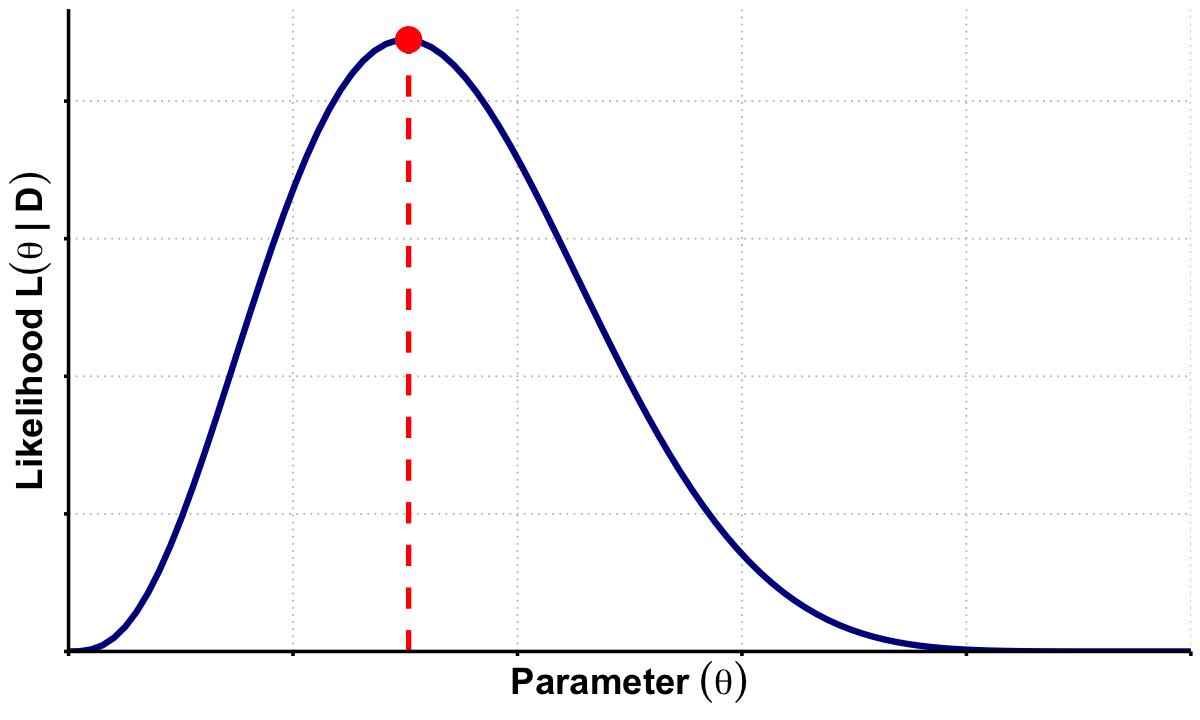

In [10]:
library(ggplot2)
options(repr.plot.width = 10, repr.plot.height = 6)

# Likelihood function and evaluation
q_vals <- seq(0, 1, length = 100)
likelihood_vals <- q_vals^3 * (1 - q_vals)^7
df_lik <- data.frame(q = q_vals, Likelihood = likelihood_vals)

# Find peak location and value
q_peak <- q_vals[which.max(likelihood_vals)]
max_lik <- max(likelihood_vals)

# Create the MLE plot with no axis text and larger axis titles
p_mle <- ggplot(df_lik, aes(x = q, y = Likelihood)) +
  geom_line(color = "darkblue", linewidth = 1.8) +
  annotate("segment", x = q_peak, xend = q_peak, y = 0, yend = max_lik,
           color = "red", linetype = "dashed", linewidth = 1.5) +
  annotate("point", x = q_peak, y = max_lik, color = "red", size = 7) +  # Larger peak point
  labs(x = expression(bold(Parameter~(theta))), 
       y = expression(bold(Likelihood~L(theta~'|'~D)))) +
  scale_x_continuous(breaks = seq(0, 1, 0.2), limits = c(0, 1), expand = c(0, 0)) +
  scale_y_continuous(expand = expansion(mult = c(0, 0.05))) +
  theme_minimal() +
  theme(
    text = element_text(size = 14, face = "bold"),
    plot.title = element_blank(),
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.title.x = element_text(size = 22, face = "bold"),  # Slightly larger
    axis.title.y = element_text(size = 22, face = "bold"),  # Slightly larger
    panel.grid.major = element_line(color = "gray", linetype = "dotted"),
    panel.grid.minor = element_blank(),
    axis.line = element_line(linewidth = 1),
    axis.ticks = element_line(linewidth = 1),
    panel.background = element_rect(fill = "transparent", color = NA),
    plot.background = element_rect(fill = "transparent", color = NA)
  )

# Display and save the plot
print(p_mle)

ggsave("./cartoons/MLE.png", plot = p_mle, 
       width = 10, height = 6, 
       bg = "transparent", 
       dpi = 300)
